## Program Structure

In [1]:
'''

1. The structure of this program is such that the functions to be used are defined first and called later
into the program. 
2. First we define the utility functions that are called as required through the program. These are followed
by regression funcitons namely, Linear Regression and MLP Regressor. 
3. The main function is the regressionPerTarget or Perform Regression Function (Not Great Names) which
basically calls the above regression functions and does additional processing like splitting the dataset.
4. The combinatorial feature seleciton fucntion choses nCk combinations of features for a range of 1 to k features.
This gives us the best set of features that will maximize the R^2 or MSE Scores that are used to gauge the performance
of regression functions. 
5. Ignore the debugging section, that is where we will start our new work of joining the tables. 

'''

'\n\n1. The structure of this program is such that the functions to be used are defined first and called later\ninto the program. \n2. First we define the utility functions that are called as required through the program. These are followed\nby regression funcitons namely, Linear Regression and MLP Regressor. \n3. The main function is the regressionPerTarget or Perform Regression Function (Not Great Names) which\nbasically calls the above regression functions and does additional processing like splitting the dataset.\n4. The combinatorial feature seleciton fucntion choses nCk combinations of features for a range of 1 to k features.\nThis gives us the best set of features that will maximize the R^2 or MSE Scores that are used to gauge the performance\nof regression functions. \n5. Ignore the debugging section, that is where we will start our new work of joining the tables. \n\n'

## Imports and Configurations

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import os,sys
from sklearn import preprocessing, linear_model
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from itertools import combinations



from matplotlib import pyplot as plt

pd.set_option("display.max_rows",20)
pd.set_option("display.max_columns",20)
pd.set_option('max_colwidth',400)

from sklearn.preprocessing import Imputer, OneHotEncoder

### Utility Functions

In [3]:
from sklearn.preprocessing import Imputer, OneHotEncoder

def dropFeatures(dframe,featureList):
    '''Removes all the features or column names in featureList from dframe'''
    
    for feature in featureList:
        if feature not in list(dframe):
            raise ValueError('feature not in featurelist')

    return dframe.drop(columns=[feature for feature in list(dframe) if feature in featureList],axis=1)
    
    

def categoricalToNumerical(dframe):
    
    '''
    categoricalToNumerical takes a dataframe or dataset as an input and splits it into categorical and numerical
    features. The numerical features are returned as is whereas categorical features are converted to One Hot 
    Encoded Vectors
    '''
    
    #Listing a dframe returns the list of all lables or column names
    all_features = list(dframe)

    #Features that are neither 'O' or 'int/float64' could be lost, raise ValueError
    categorical_features = [feature for feature in all_features if dframe[feature].dtype == 'O']
    numerical_features = [feature for feature in all_features if dframe[feature].dtype in ['int64','float64']]

    #Converts categorical features into One Hot Encoded Vectors
    oneHotEncoded_categoricalFeatures = [pd.get_dummies(dframe[feature],prefix=feature) for feature in categorical_features]
    
    #Categorical Features
    featureSet1 = []
    
    #Numerical Features
    featureSet2 = []
    
    
    '''
    
    #Explain in person
    
    '''

    if len(oneHotEncoded_categoricalFeatures)>1:
        featureSet1 = pd.concat([feature for feature in oneHotEncoded_categoricalFeatures],axis=1)

    elif len(oneHotEncoded_categoricalFeatures)==1:
        featureSet1 = oneHotEncoded_categoricalFeatures[0]
    
    else:
        if len(numerical_features)==0:
            raise ValueError('DataFrame has no columns')

    if len(numerical_features)>1:
        featureSet2 = pd.concat([dframe[feature] for feature in numerical_features],axis=1)

    elif len(numerical_features)==1:
        featureSet2 = dframe.loc[:,[numerical_features[0]]]

    else:
        if len(oneHotEncoded_categoricalFeatures)==0:
            raise ValueError('DataFrame has no columns')   
    return featureSet1,featureSet2

def normalizeCols(ser):
    
    '''
    Fills the missing values in a single column and Standardizes the dataset
    '''

    ser = ser.astype('float64')
    min_max_scaler = preprocessing.MinMaxScaler()
    
    #Filling in Missing Values
    ser = ser.fillna(ser.mean())
    ser = np.array(ser).reshape(-1,1)
    
    #Standardizing dataset using MinMaxScaler from Sklearn
    ans = min_max_scaler.fit_transform(ser)

    #Flatten converts column vector to row vector
    return pd.Series(ans.flatten())

def plot_graph(X,Y_actual,Y_predicted,color1,color2,linewidth,target_variable,singular_feature):
    
    '''
    Generalized Graph Plotting Function to plot graphs using a function call
    '''
        
    plt.figure(figsize=(10,5))
    
    plt.scatter(X,Y_actual,color=color1,label='Data')
    plt.plot(X,Y_predicted,color=color2,label="Prediction",linewidth=1)
    plt.ylabel(target_variable)
    plt.xlabel(singular_feature)

## Linear Regression

In [4]:
def linear_regression(x_train, x_test, y_train, y_test):
    
    '''
    Linear Regression from SKlearn. Takes the train and test dataset and returns the model,
    scoring functions(r^2 and mse), and predictions
    
    '''
    
    #Linear Regression
    lm = linear_model.LinearRegression()
    model = lm.fit(x_train, y_train)
    predictions = lm.predict(x_test)
    y_pred = predictions.ravel()
    
    #Uses the R^2 metric
    r2 = model.score(x_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    
    #Future Feature
    #kfold = model_selection.KFold(n_splits=5)
    #results = model_selection.cross_val_score(lm, x_train, y_train, cv=kfold, scoring='r2')
    #"R ^2: "+str(results.mean())
    
    return lm,r2,mse,predictions

## MultiLayer Regressor

In [5]:
def mlp_regression(x_train, x_test, y_train, y_test):
    
    '''
    Multi-Layer Perceptron Regression from SKlearn. Takes the train and test dataset and returns the model,
    scoring functions(r^2 and mse), and predictions
    
    '''
    
    mlp = MLPRegressor(hidden_layer_sizes=(30,30,30), max_iter=2000,alpha=1.0,solver='adam',learning_rate_init=0.001,learning_rate='adaptive', tol=0.01,verbose=False,warm_start=True)
    mlp_obj = mlp.fit(x_train.values,y_train.values.ravel())
    
    prediction_mlp = mlp.predict(x_test)
    y_pred = prediction_mlp.ravel()
    r2 = mlp.score(x_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return mlp,r2,mse,prediction_mlp


## Perform Regression Function

In [6]:
def regressionPerTarget(target,dframe,mode,input_variable,classifier):
    
    '''
    regressionPerTarget takes the following parameters:
    
    target = The feature that will be treated as a target variable or variable that has to be predicted
    dframe = The dataset
    mode = 1: For Debugging, Where the values of all the features except for the input_variable are set to 1.
              The input variable is compared with the target variable
           0 or any other number: No Debugging. Features used as is
    input_variable: For Debugging, Where the input_variable is a feature that is compared with target_variable
    classifier: Name of the classifier to be used. As of now there are only 2 classifiers. 
    
    '''
    
    target_variable = target
    f3 = dframe
    
    #Prepare the Target Variable and filling in missing values
    '''
    loadprediction_groundTruth = This dataframe consists of only the target_variable column
    '''
    loadprediction_groundTruth = f3.loc[:,[target_variable]]
    loadprediction_groundTruth = loadprediction_groundTruth.fillna(loadprediction_groundTruth.mean())
    
    #Removing Target Variable from Dataset for train_test_split
    f3 = dropFeatures(f3,[target_variable])

   
    #Features of dataset f3 are split into categorical and numerical features         
    cat_feat, num_feat = categoricalToNumerical(f3)

    
    #Normalize and add missing valuses in the numerical features
    for feature in list(num_feat):
        num_feat[feature]= normalizeCols(num_feat[feature])
        
    #Combine the categorical and numerical features
    if not list(cat_feat):
        loadprediction_samples = num_feat
    elif not list(num_feat):
        loadprediction_samples = cat_feat.astype('float64')
    else:
        loadprediction_samples = pd.concat([cat_feat.astype('float64'),num_feat],axis=1)
        
    
    ##Only For plotting
    if mode == 1 and input_variable != None:
        print("Entered Single Input - Rest Mean mode")
        meaned_loadprediction_samples = pd.DataFrame()
        for feature in list(loadprediction_samples):
            if feature != input_variable:
                meaned_loadprediction_samples[feature]=pd.Series(np.full(loadprediction_samples[feature].shape,loadprediction_samples[feature].mean()))
            else:
                meaned_loadprediction_samples[input_variable]=pd.Series(loadprediction_samples[input_variable].values)    
        loadprediction_samples = pd.DataFrame(meaned_loadprediction_samples)
      
    
    #Split The Dataset for training and testing
    x_train, x_test, y_train, y_test = train_test_split(loadprediction_samples,loadprediction_groundTruth,test_size=0.3,shuffle=True,random_state=10)

    if classifier == "LinearRegression":
        #Linear Regression
        model,r2,mse,predictions = linear_regression(x_train, x_test, y_train, y_test)
    else:
        #MLP Regressor
        model,r2,mse,predictions = mlp_regression(x_train, x_test, y_train, y_test)
    
    if not list(cat_feat):
        cat_feat = cat_feat
    return r2,mse,cat_feat,num_feat,loadprediction_samples,loadprediction_groundTruth,model,x_train,x_test,y_train,y_test, predictions

## Combinatorial Feature Selection

In [7]:
def feature_selection(regressor_type,regressionPerTarget,X,target_variable):
    
    '''
    feature_selection is a method that selects multiple combinations of features and tries to predict
    the target_variable using regressor_type(regression function)
    '''
    
    '''X is the dataframe containing the training set'''
    
    
    x_target_variable = X.loc[:,target_variable]
    
    # Dropping the target variable, switch to custom dropFeatures(dframe,featureList)
    X = X.drop(columns=target_variable,axis=1)
    
    #Number of features in X
    n_features = X.shape[1]
    input_variable = None
    
    
    
    '''Consider removing these lists and doing it dynamically'''
    subset_list,r2list,mselist = [],[],[]
    
    for k in range(1,n_features+1):
        ''' Combinations: nCk = n! / (k! * (n-k)!)
            Where n is the number of features and k is the length of combination 
        '''
        coms = combinations(list(X),k)
        
        for index,feature_subset in enumerate(coms):
            
            #Creating a dataframe with the subset of features
            X_sub = X.loc[:,list(feature_subset)]
            
            #Adding target_variable feature to the subset of new features
            X_new = pd.concat([X_sub,x_target_variable],axis=1)
            
            '''
            Sending the subsets to the Perform Regression Function to find the best set of features.
            The set of features are ranked by their R^2 or MSE scores
            '''
            
            #Performing Perform Regression Function on the dataset of subset of features 
            r2,mse,cat_feat,num_feat,loadprediction_samples,loadprediction_groundTruth,lm,x_train,x_test,y_train,y_test,predictions= regressionPerTarget(target_variable,X_new,0,input_variable,classifier="regressor_type")
            subset_list.append(','.join(list(feature_subset)))
            #subset_list[index]= list(feature_subset)
            r2list.append(r2)
            mselist.append(mse)
        
    

    return pd.DataFrame({'Feature Subsets': subset_list, 'R^2 Values': r2list, 'MSE Values': mselist})

    

## Reading data into memory

In [8]:
data = "../data/"
csvfiles = os.listdir(data)

if '.DS_Store' in csvfiles:
    csvfiles.remove('.DS_Store')

print (csvfiles)

#f1 = pd.read_csv(data+csvfiles[0],low_memory=False)
#f2 = pd.read_csv(data+csvfiles[1],low_memory=False)
#f3 = pd.read_csv(data+csvfiles[2],low_memory=False)
#f4 = pd.read_csv(data+csvfiles[3],low_memory=False)
f3 = pd.read_csv(data+'trainingload excel report 1527265035365.csv',low_memory=False)
f4 = pd.read_csv(data+'gpscatapultuploader excel report 1527265475004.csv',low_memory=False)

['trainingload excel report 1527265035365.csv', 'wellness excel report 1527265037959.csv', 'gpscatapultuploader excel report 1527265475004.csv', 'trainingavailability excel report 1527265061608.csv']


## Exploring the trainingload dataset for Load Prediction

In [10]:
f3

Date         Key      Phase of Season  Session Type  RPE  \
0      27/02/2018    Player 1  Winter Conditioning  Conditioning  8.0   
1      27/02/2018    Player 3  Winter Conditioning  Conditioning  8.0   
2      27/02/2018    Player 7  Winter Conditioning  Conditioning  8.0   
3      27/02/2018    Player 8  Winter Conditioning         Rehab  5.0   
4      27/02/2018    Player 4  Winter Conditioning  Conditioning  8.0   
5      27/02/2018    Player 6  Winter Conditioning  Conditioning  8.0   
6      27/02/2018   Player 96  Winter Conditioning  Conditioning  8.0   
7      27/02/2018  Player 102  Winter Conditioning  Conditioning  8.0   
8      27/02/2018   Player 90  Winter Conditioning  Conditioning  8.0   
9      27/02/2018   Player 94  Winter Conditioning  Conditioning  8.0   
...           ...         ...                  ...           ...  ...   
27792  01/07/2016   Player 79  Summer Conditioning  Conditioning  6.0   
27793  01/07/2016  Player 149  Summer Conditioning  Conditioning  8.0   
27794  01/07/2016   Player 12  Summer Conditioning  Conditioning  6.0   
27795  01/07/2016   Player 42  Summer Conditioning  Conditioning  6.0   
27796  01/07/2016   Player 61  Summer Conditioning  Conditioning  6.0   
27797  01/07/2016  Player 105  Summer Conditioning  Conditioning  6.0   
27798  01/07/2016   Player 66  Summer Conditioning  Conditioning  5.0   
27799  01/07/2016   Player 65  Summer Conditioning  Conditioning  5.0   
27800  01/07/2016   Player 97  Summer Conditioning  Conditioning  5.0   
27801  01/07/2016   Player 56  Summer Conditioning  Conditioning  6.0   

            RPE type  Duration  Overall load  Acute Load Total  \
0      Group average        60         480.0              1590   
1      Group average        60         480.0              1590   
2      Group average        60         480.0              1410   
3      Group average        60         300.0              1230   
4      Group average        60         480.0              1410   
5      Group average        60         480.0              1590   
6      Group average        60         480.0              1590   
7      Group average        60         480.0              1590   
8      Group average        60         480.0              1590   
9      Group average        60         480.0              1590   
...              ...       ...           ...               ...   
27792            NaN        42         252.0               994   
27793            NaN        42         336.0              1375   
27794            NaN        42         252.0               594   
27795            NaN        42         252.0               880   
27796            NaN        42         252.0               994   
27797            NaN        42         252.0               994   
27798            NaN        42         210.0              1146   
27799            NaN        42         210.0               895   
27800            NaN        42         210.0               895   
27801            NaN        42         252.0               994   

       Acute Load Average     ...       TSB  Last 14d minimum  TSB Flag  \
0                     398     ...      1.04              1.00        No   
1                     398     ...      1.04              1.00        No   
2                     352     ...      1.14              1.00        No   
3                     308     ...      1.13              1.00        No   
4                     352     ...      1.02              0.88        No   
5                     398     ...      1.04              1.00        No   
6                     398     ...      1.04              1.00        No   
7                     398     ...      1.04              1.00        No   
8                     398     ...      1.04              1.00        No   
9                     398     ...      1.04              1.00        No   
...                   ...     ...       ...               ...       ...   
27792                 331     ...      0.89          

In [3]:
f4

Date         Key  Session Type Training Status        Position  \
0       27/02/2018  Player 108  Conditioning   Full Training      Linebacker   
1       27/02/2018  Player 108  Conditioning   Full Training      Linebacker   
2       27/02/2018  Player 108  Conditioning   Full Training      Linebacker   
3       27/02/2018  Player 108  Conditioning   Full Training      Linebacker   
4       27/02/2018  Player 108  Conditioning   Full Training      Linebacker   
5       27/02/2018   Player 26  Conditioning   Full Training  Offensive Line   
6       27/02/2018   Player 26  Conditioning   Full Training  Offensive Line   
7       27/02/2018   Player 26  Conditioning   Full Training  Offensive Line   
8       27/02/2018   Player 26  Conditioning   Full Training  Offensive Line   
9       27/02/2018   Player 24  Conditioning   Full Training   Wide Receiver   
...            ...         ...           ...             ...             ...   
141459  01/07/2016    Player 5  Conditioning   Full Training   Wide Receiver   
141460  01/07/2016    Player 5  Conditioning   Full Training   Wide Receiver   
141461  01/07/2016    Player 5  Conditioning   Full Training   Wide Receiver   
141462  01/07/2016   Player 97  Conditioning   Full Training       Tight End   
141463  01/07/2016   Player 97  Conditioning   Full Training       Tight End   
141464  01/07/2016   Player 97  Conditioning   Full Training       Tight End   
141465  01/07/2016   Player 97  Conditioning   Full Training       Tight End   
141466  01/07/2016   Player 97  Conditioning   Full Training       Tight End   
141467  01/07/2016   Player 97  Conditioning   Full Training       Tight End   
141468  01/07/2016   Player 97  Conditioning   Full Training       Tight End   

           Line      Period Name  Period Number Total Duration  \
0       Defense          Session            0.0       01:12:19   
1       Defense          STRETCH            1.0       00:14:32   
2       Defense        8 STATION            2.0       00:32:12   
3       Defense        4 STATION            3.0       00:16:33   
4       Defense             INDY            4.0       00:09:01   
5       Offense          Session            0.0       00:46:55   
6       Offense          STRETCH            1.0       00:14:32   
7       Offense        8 STATION            2.0       00:23:21   
8       Offense             INDY            3.0       00:09:01   
9       Offense          Session            0.0       01:12:19   
...         ...              ...            ...            ...   
141459  Offense            PLYOS            4.0       00:04:00   
141460  Offense          SPRINTS            5.0       00:19:00   
141461  Offense        COOL DOWN            6.0       00:05:00   
141462  Offense          Session            0.0       01:25:00   
141463  Offense           1 ON 1            1.0       00:12:00   
141464  Offense           7 ON 7            2.0       00:31:00   
141465  Offense  DYNAMIC WARM UP            3.0       00:14:00   
141466  Offense            PLYOS            4.0       00:04:00   
141467  Offense          SPRINTS            5.0       00:19:00   
141468  Offense        COOL DOWN            6.0       00:05:00   

        Total Distance     ...       PLSlow 7D SDS  EE 7D SDS  \
0              0.00000     ...                1.95       0.70   
1              0.00000     ...                 NaN        NaN   
2              0.00000     ...                 NaN        NaN   
3              0.00000     ...                 NaN        NaN   
4              0.00000     ...                 NaN        NaN   
5              0.00000     ...                1.68      -0.12   
6              0.00000     ...                 NaN        NaN   
7              0.00000     ...                 NaN        NaN   
8              0.00000     ...                 NaN        NaN   
9              0.00000     ...                1.66       1.74   
...                ...     ...                 ...        ...   
141459       103.515

In [21]:
#Selecting Weekly Load as the feature to predict
target_variable = "RPE"
input_variable = "Acute Load Average"

'''These features are removed as suggested by the domain expert'''
remove_additional_features = ['Date', 'Key','Phase of Season','Session Type','RPE type','Overall load','Acute Load Total','Monotony','Strain','TSB Flag','Last week','Two weeks ago', 'LWk%change','Weekly Load']
f3_lr_rpe = dropFeatures(f3,remove_additional_features)
f3_lr_rpe

RPE  Duration  Acute Load Average  Chronic Load Average   TSB  \
0      8.0        60                 398                   381  1.04   
1      8.0        60                 398                   381  1.04   
2      8.0        60                 352                   309  1.14   
3      5.0        60                 308                   273  1.13   
4      8.0        60                 352                   345  1.02   
5      8.0        60                 398                   381  1.04   
6      8.0        60                 398                   381  1.04   
7      8.0        60                 398                   381  1.04   
8      8.0        60                 398                   381  1.04   
9      8.0        60                 398                   381  1.04   
...    ...       ...                 ...                   ...   ...   
27792  6.0        42                 331                   373  0.89   
27793  8.0        42                 458                   419  1.09   
27794  6.0        42                 297                   420  0.71   
27795  6.0        42                 293                   337  0.87   
27796  6.0        42                 331                   340  0.97   
27797  6.0        42                 331                   357  0.93   
27798  5.0        42                 382                   390  0.98   
27799  5.0        42                 298                   302  0.99   
27800  5.0        42                 298                   312  0.96   
27801  6.0        42                 331                   322  1.03   

       Last 14d minimum Muscle soreness  Fatigue      Sleep  
0                  1.00             NaN      NaN        NaN  
1                  1.00             NaN      NaN        NaN  
2                  1.00             NaN      NaN        NaN  
3                  1.00             NaN      NaN        NaN  
4                  0.88             NaN      NaN        NaN  
5                  1.00             NaN      NaN        NaN  
6                  1.00             NaN      NaN        NaN  
7                  1.00             NaN      NaN        NaN  
8                  1.00             NaN      NaN        NaN  
9                  1.00             NaN      NaN        NaN  
...                 ...             ...      ...        ...  
27792              0.89         Average  Average  Very High  
27793              1.00         Average  Average    Average  
27794              0.71        Very Low      Low        Low  
27795              0.87            High      Low       High  
27796              0.81         Average  Average    Average  
27797              0.93            High  Average    Average  
27798              0.88         Average  Average    Average  
27799              0.98         Average  Average    Average  
27800              0.96         Average  Average    Average  
27801              0.98             Low      Low        Low  

[27802 rows x 9 columns]

## Performing Linear Regression

In [41]:
r2,mse,cat_feat,num_feat,loadprediction_samples,loadprediction_groundTruth,lm,x_train,x_test,y_train,y_test,predictions=regressionPerTarget(target_variable,f3_lr_rpe,0,input_variable,classifier=
                    "LinearRegression")


['Muscle soreness', 'Fatigue', 'Sleep']
['Duration', 'Acute Load Average', 'Chronic Load Average', 'TSB', 'Last 14d minimum']
       Duration  Acute Load Average  Chronic Load Average   TSB  \
0            60                 398                   381  1.04   
1            60                 398                   381  1.04   
2            60                 352                   309  1.14   
3            60                 308                   273  1.13   
4            60                 352                   345  1.02   
5            60                 398                   381  1.04   
6            60                 398                   381  1.04   
7            60                 398                   381  1.04   
8            60                 398                   381  1.04   
9            60                 398                   381  1.04   
...         ...                 ...                   ...   ...   
27792        42                 331                   373  0.89   
277

In [27]:
x_train

Muscle soreness_Average  Muscle soreness_High  Muscle soreness_Low  \
8023                       0.0                   0.0                  0.0   
26857                      0.0                   0.0                  1.0   
4429                       0.0                   0.0                  0.0   
3661                       0.0                   0.0                  1.0   
5150                       1.0                   0.0                  0.0   
21925                      1.0                   0.0                  0.0   
21576                      0.0                   0.0                  0.0   
10461                      0.0                   0.0                  0.0   
25514                      0.0                   0.0                  0.0   
24741                      1.0                   0.0                  0.0   
...                        ...                   ...                  ...   
16241                      0.0                   0.0                  0.0   
10141                      1.0                   0.0                  0.0   
17904                      0.0                   0.0                  0.0   
4829                       0.0                   0.0                  0.0   
10201                      1.0                   0.0                  0.0   
9372                       0.0                   0.0                  0.0   
7291                       0.0                   0.0                  0.0   
17728                      0.0                   1.0                  0.0   
7293                       0.0                   0.0                  0.0   
17673                      0.0                   0.0                  0.0   

       Muscle soreness_Very High  Muscle soreness_Very Low  Fatigue_Average  \
8023                         0.0                       0.0              0.0   
26857                        0.0                       0.0              1.0   
4429                         0.0                       0.0              0.0   
3661                         0.0                       0.0              0.0   
5150                         0.0                       0.0              1.0   
21925                        0.0                       0.0              1.0   
21576                        0.0                       0.0              0.0   
10461                        0.0                       0.0              0.0   
25514                        0.0                       0.0              0.0   
24741                        0.0                       0.0              1.0   
...                          ...                       ...              ...   
16241                        0.0                       1.0              0.0   
10141                        0.0                       0.0              1.0   
17904                        0.0                       0.0              0.0   
4829                         0.0                       0.0              0.0   
10201                        0.0                       0.0              1.0   
9372                         0.0                       0.0              0.0   
7291                         0.0                       0.0              0.0   
17728                        0.0                       0.0              0.0   
7293                         0.0                       0.0              0.0   
17673                        0.0                       0.0              0.0   

       Fatigue_High  Fatigue_Low  Fatigue_Very High  Fatigue_Very Low  \
8023            0.0          0.0                0.0               0.0   
26857           0.0          0.0                0.0               0.0   
4429            0.0          0.0                0.0               0.0   
3661            0.0          1.0                0.0               0.0   
5150            0.0          0.0                0.0               0.0   
21925           0.0          0.0                0.0               0.0   
21576           0.0          0.0                0.0           

In [28]:
x_test

Muscle soreness_Average  Muscle soreness_High  Muscle soreness_Low  \
684                        0.0                   0.0                  0.0   
1047                       0.0                   0.0                  1.0   
10095                      0.0                   1.0                  0.0   
19958                      1.0                   0.0                  0.0   
11259                      1.0                   0.0                  0.0   
1766                       0.0                   0.0                  0.0   
23531                      1.0                   0.0                  0.0   
18064                      1.0                   0.0                  0.0   
1879                       0.0                   0.0                  0.0   
3625                       1.0                   0.0                  0.0   
...                        ...                   ...                  ...   
5257                       1.0                   0.0                  0.0   
2447                       1.0                   0.0                  0.0   
4261                       1.0                   0.0                  0.0   
27204                      0.0                   0.0                  0.0   
25313                      0.0                   0.0                  0.0   
27104                      0.0                   0.0                  0.0   
3042                       1.0                   0.0                  0.0   
6780                       0.0                   0.0                  0.0   
1642                       0.0                   0.0                  0.0   
9300                       1.0                   0.0                  0.0   

       Muscle soreness_Very High  Muscle soreness_Very Low  Fatigue_Average  \
684                          0.0                       0.0              0.0   
1047                         0.0                       0.0              0.0   
10095                        0.0                       0.0              1.0   
19958                        0.0                       0.0              1.0   
11259                        0.0                       0.0              1.0   
1766                         0.0                       0.0              0.0   
23531                        0.0                       0.0              1.0   
18064                        0.0                       0.0              1.0   
1879                         0.0                       0.0              0.0   
3625                         0.0                       0.0              1.0   
...                          ...                       ...              ...   
5257                         0.0                       0.0              0.0   
2447                         0.0                       0.0              1.0   
4261                         0.0                       0.0              1.0   
27204                        0.0                       0.0              0.0   
25313                        0.0                       0.0              0.0   
27104                        0.0                       0.0              0.0   
3042                         0.0                       0.0              1.0   
6780                         0.0                       1.0              0.0   
1642                         0.0                       1.0              0.0   
9300                         0.0                       0.0              1.0   

       Fatigue_High  Fatigue_Low  Fatigue_Very High  Fatigue_Very Low  \
684             0.0          0.0                0.0               0.0   
1047            0.0          1.0                0.0               0.0   
10095           0.0          0.0                0.0               0.0   
19958           0.0          0.0                0.0               0.0   
11259           0.0          0.0                0.0               0.0   
1766            0.0          0.0                0.0               0.0   
23531           0.0          0.0                0.0           

In [29]:
y_train

RPE
8023   4.0
26857  5.0
4429   3.0
3661   3.0
5150   5.0
21925  6.0
21576  3.0
10461  5.0
25514  7.0
24741  2.0
...    ...
16241  5.0
10141  5.0
17904  9.0
4829   8.0
10201  2.0
9372   8.0
7291   4.0
17728  4.0
7293   4.0
17673  4.0

[19461 rows x 1 columns]

In [30]:
y_test

RPE
684     8.0
1047    5.0
10095   6.0
19958   5.0
11259   5.0
1766    5.0
23531   7.0
18064   4.0
1879    6.0
3625    7.0
...     ...
5257    7.0
2447    2.0
4261    4.0
27204   4.0
25313   7.0
27104   4.0
3042    7.0
6780    3.0
1642   10.0
9300    4.0

[8341 rows x 1 columns]

## Categorical Features converted to One Hot Encoded Vectors

In [14]:
#cat_feat, num_feat = categoricalToNumerical(f3,["Date","Key",target_variable])
#cat_feat = cat_feat.astype('float64')
cat_feat

Muscle soreness_Average  Muscle soreness_High  Muscle soreness_Low  \
0                            0                     0                    0   
1                            0                     0                    0   
2                            0                     0                    0   
3                            0                     0                    0   
4                            0                     0                    0   
5                            0                     0                    0   
6                            0                     0                    0   
7                            0                     0                    0   
8                            0                     0                    0   
9                            0                     0                    0   
...                        ...                   ...                  ...   
27792                        1                     0                    0   
27793                        1                     0                    0   
27794                        0                     0                    0   
27795                        0                     1                    0   
27796                        1                     0                    0   
27797                        0                     1                    0   
27798                        1                     0                    0   
27799                        1                     0                    0   
27800                        1                     0                    0   
27801                        0                     0                    1   

       Muscle soreness_Very High  Muscle soreness_Very Low  Fatigue_Average  \
0                              0                         0                0   
1                              0                         0                0   
2                              0                         0                0   
3                              0                         0                0   
4                              0                         0                0   
5                              0                         0                0   
6                              0                         0                0   
7                              0                         0                0   
8                              0                         0                0   
9                              0                         0                0   
...                          ...                       ...              ...   
27792                          0                         0                1   
27793                          0                         0                1   
27794                          0                         1                0   
27795                          0                         0                0   
27796                          0                         0                1   
27797                          0                         0                1   
27798                          0                         0                1   
27799                          0                         0                1   
27800                          0                         0                1   
27801                          0                         0                0   

       Fatigue_High  Fatigue_Low  Fatigue_Very High  Fatigue_Very Low  \
0                 0            0                  0                 0   
1                 0            0                  0                 0   
2                 0            0                  0                 0   
3                 0            0                  0                 0   
4                 0            0                  0                 0   
5                 0            0                  0                 0   
6                 0            0                  0           

## Numerical Features: Normalized and without Missing Values

In [15]:
num_feat    

Duration  Acute Load Average  Chronic Load Average       TSB  \
0      0.166667            0.101571              0.112869  0.208817   
1      0.166667            0.101571              0.112869  0.208817   
2      0.166667            0.088664              0.087553  0.232019   
3      0.166667            0.076319              0.074895  0.229698   
4      0.166667            0.088664              0.100211  0.204176   
5      0.166667            0.101571              0.112869  0.208817   
6      0.166667            0.101571              0.112869  0.208817   
7      0.166667            0.101571              0.112869  0.208817   
8      0.166667            0.101571              0.112869  0.208817   
9      0.166667            0.101571              0.112869  0.208817   
...         ...                 ...                   ...       ...   
27792  0.116667            0.082772              0.110056  0.174014   
27793  0.116667            0.118406              0.126231  0.220418   
27794  0.116667            0.073232              0.126582  0.132251   
27795  0.116667            0.072110              0.097398  0.169374   
27796  0.116667            0.082772              0.098453  0.192575   
27797  0.116667            0.082772              0.104430  0.183295   
27798  0.116667            0.097082              0.116034  0.194896   
27799  0.116667            0.073513              0.085091  0.197216   
27800  0.116667            0.073513              0.088608  0.190255   
27801  0.116667            0.082772              0.092124  0.206497   

       Last 14d minimum  
0              0.284768  
1              0.284768  
2              0.284768  
3              0.284768  
4              0.245033  
5              0.284768  
6              0.284768  
7              0.284768  
8              0.284768  
9              0.284768  
...                 ...  
27792          0.248344  
27793          0.284768  
27794          0.188742  
27795          0.241722  
27796          0.221854  
27797          0.261589  
27798          0.245033  
27799          0.278146  
27800          0.271523  
27801          0.278146  

[27802 rows x 5 columns]

## Preprocessed dataset for load prediction

In [16]:
#loadprediction_samples = pd.concat([cat_feat,num_feat],axis=1)
loadprediction_samples

Muscle soreness_Average  Muscle soreness_High  Muscle soreness_Low  \
0                          0.0                   0.0                  0.0   
1                          0.0                   0.0                  0.0   
2                          0.0                   0.0                  0.0   
3                          0.0                   0.0                  0.0   
4                          0.0                   0.0                  0.0   
5                          0.0                   0.0                  0.0   
6                          0.0                   0.0                  0.0   
7                          0.0                   0.0                  0.0   
8                          0.0                   0.0                  0.0   
9                          0.0                   0.0                  0.0   
...                        ...                   ...                  ...   
27792                      1.0                   0.0                  0.0   
27793                      1.0                   0.0                  0.0   
27794                      0.0                   0.0                  0.0   
27795                      0.0                   1.0                  0.0   
27796                      1.0                   0.0                  0.0   
27797                      0.0                   1.0                  0.0   
27798                      1.0                   0.0                  0.0   
27799                      1.0                   0.0                  0.0   
27800                      1.0                   0.0                  0.0   
27801                      0.0                   0.0                  1.0   

       Muscle soreness_Very High  Muscle soreness_Very Low  Fatigue_Average  \
0                            0.0                       0.0              0.0   
1                            0.0                       0.0              0.0   
2                            0.0                       0.0              0.0   
3                            0.0                       0.0              0.0   
4                            0.0                       0.0              0.0   
5                            0.0                       0.0              0.0   
6                            0.0                       0.0              0.0   
7                            0.0                       0.0              0.0   
8                            0.0                       0.0              0.0   
9                            0.0                       0.0              0.0   
...                          ...                       ...              ...   
27792                        0.0                       0.0              1.0   
27793                        0.0                       0.0              1.0   
27794                        0.0                       1.0              0.0   
27795                        0.0                       0.0              0.0   
27796                        0.0                       0.0              1.0   
27797                        0.0                       0.0              1.0   
27798                        0.0                       0.0              1.0   
27799                        0.0                       0.0              1.0   
27800                        0.0                       0.0              1.0   
27801                        0.0                       0.0              0.0   

       Fatigue_High  Fatigue_Low  Fatigue_Very High  Fatigue_Very Low  \
0               0.0          0.0                0.0               0.0   
1               0.0          0.0                0.0               0.0   
2               0.0          0.0                0.0               0.0   
3               0.0          0.0                0.0               0.0   
4               0.0          0.0                0.0               0.0   
5               0.0          0.0                0.0               0.0   
6               0.0          0.0                0.0           

## Ground Truth Labels

In [17]:
#loadprediction_groundTruth = f3.loc[:,[target_variable]]
#loadprediction_groundTruth = loadprediction_groundTruth.fillna(loadprediction_groundTruth.mean())
loadprediction_groundTruth

RPE
0      8.0
1      8.0
2      8.0
3      5.0
4      8.0
5      8.0
6      8.0
7      8.0
8      8.0
9      8.0
...    ...
27792  6.0
27793  8.0
27794  6.0
27795  6.0
27796  6.0
27797  6.0
27798  5.0
27799  5.0
27800  5.0
27801  6.0

[27802 rows x 1 columns]

In [18]:
#singular_feature = 'Strain'
#meaned_loadprediction_samples = pd.DataFrame()
#for feature in list(loadprediction_samples):
    #if feature != singular_feature:
        #meaned_loadprediction_samples[feature]=pd.Series(np.full(loadprediction_samples[feature].shape,loadprediction_samples[feature].mean()))
    #else:
        #meaned_loadprediction_samples[singular_feature]=pd.Series(loadprediction_samples[singular_feature].values)    
#loadprediction_samples = pd.DataFrame(meaned_loadprediction_samples)
loadprediction_samples

Muscle soreness_Average  Muscle soreness_High  Muscle soreness_Low  \
0                          0.0                   0.0                  0.0   
1                          0.0                   0.0                  0.0   
2                          0.0                   0.0                  0.0   
3                          0.0                   0.0                  0.0   
4                          0.0                   0.0                  0.0   
5                          0.0                   0.0                  0.0   
6                          0.0                   0.0                  0.0   
7                          0.0                   0.0                  0.0   
8                          0.0                   0.0                  0.0   
9                          0.0                   0.0                  0.0   
...                        ...                   ...                  ...   
27792                      1.0                   0.0                  0.0   
27793                      1.0                   0.0                  0.0   
27794                      0.0                   0.0                  0.0   
27795                      0.0                   1.0                  0.0   
27796                      1.0                   0.0                  0.0   
27797                      0.0                   1.0                  0.0   
27798                      1.0                   0.0                  0.0   
27799                      1.0                   0.0                  0.0   
27800                      1.0                   0.0                  0.0   
27801                      0.0                   0.0                  1.0   

       Muscle soreness_Very High  Muscle soreness_Very Low  Fatigue_Average  \
0                            0.0                       0.0              0.0   
1                            0.0                       0.0              0.0   
2                            0.0                       0.0              0.0   
3                            0.0                       0.0              0.0   
4                            0.0                       0.0              0.0   
5                            0.0                       0.0              0.0   
6                            0.0                       0.0              0.0   
7                            0.0                       0.0              0.0   
8                            0.0                       0.0              0.0   
9                            0.0                       0.0              0.0   
...                          ...                       ...              ...   
27792                        0.0                       0.0              1.0   
27793                        0.0                       0.0              1.0   
27794                        0.0                       1.0              0.0   
27795                        0.0                       0.0              0.0   
27796                        0.0                       0.0              1.0   
27797                        0.0                       0.0              1.0   
27798                        0.0                       0.0              1.0   
27799                        0.0                       0.0              1.0   
27800                        0.0                       0.0              1.0   
27801                        0.0                       0.0              0.0   

       Fatigue_High  Fatigue_Low  Fatigue_Very High  Fatigue_Very Low  \
0               0.0          0.0                0.0               0.0   
1               0.0          0.0                0.0               0.0   
2               0.0          0.0                0.0               0.0   
3               0.0          0.0                0.0               0.0   
4               0.0          0.0                0.0               0.0   
5               0.0          0.0                0.0               0.0   
6               0.0          0.0                0.0           

## Splitting the dataset into train and test set

In [19]:
#x_train, x_test, y_train, y_test = train_test_split(loadprediction_samples,loadprediction_groundTruth,test_size=0.3,shuffle=True,random_state=10)

## Regression - Linear Regression

In [20]:
print ("R^2 Score: ",str(r2))
print ("Mean Squared Error: ",str(mse))

R^2 Score:  0.03536611236515097
Mean Squared Error:  31.848688388107117


## Observing the Actual vs Predicted Values
<a id='actual-predicted'></a>

In [21]:
YP = y_test[target_variable].values
y_pred = predictions.ravel()

act_pred = pd.DataFrame({input_variable:x_test[input_variable],'Actual': YP, 'Predicted': y_pred})
ap = act_pred.sort_values('Actual')
ap

Acute Load Average  Actual  Predicted
9953             0.069304     0.0   4.533593
13558            0.129349     0.0   3.760954
13560            0.160494     0.0   4.208550
23555            0.069585     0.0   4.546034
23568            0.059203     0.0   3.633958
22344            0.107744     0.0   4.776133
16924            0.049944     0.0   4.037717
13267            0.164422     1.0   4.716761
8010             0.087262     1.0   3.746447
21555            0.019080     1.0   4.237102
...                   ...     ...        ...
3734             0.079686   108.0   5.087932
3732             0.138047   109.0   5.987973
3773             0.112233   109.0   5.488575
3728             0.123737   114.0   5.597880
3752             0.143659   115.0   5.885350
3759             0.144220   121.0   6.366654
3754             0.149832   151.0   5.558660
3749             0.173681   155.0   6.197568
3761             0.073232   167.0   4.992800
3764             0.122334   213.0   5.718233

[8341 rows x 3 columns]

### Frequency Distribution of Target Variable

Text(0, 0.5, 'Frequency')

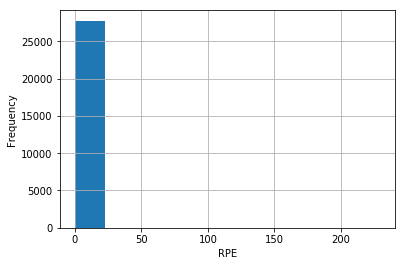

In [22]:
hist = f3[target_variable].hist(bins=10)

plt.xlabel(target_variable)
plt.ylabel("Frequency")

Text(0.5, 0, 'Range of Target Variable Values')

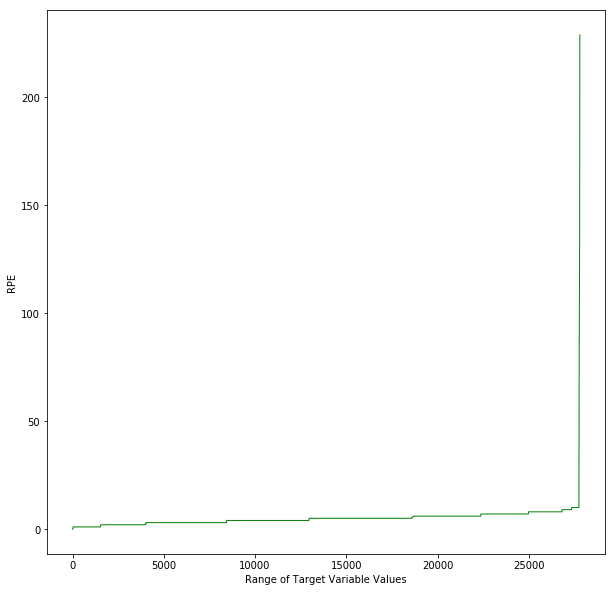

In [23]:
plt.figure(figsize=(10,10))
yft = f3[target_variable].sort_values()
xft = list(range(len(yft)))
plt.plot(xft,yft,color='green',label="Prediction", linewidth=1)
plt.ylabel(target_variable)
plt.xlabel("Range of Target Variable Values")

## Analyzing the regression function based on a single input variable<a id='analyzing-regression'></a>

### Regression line of single feature over the target variable

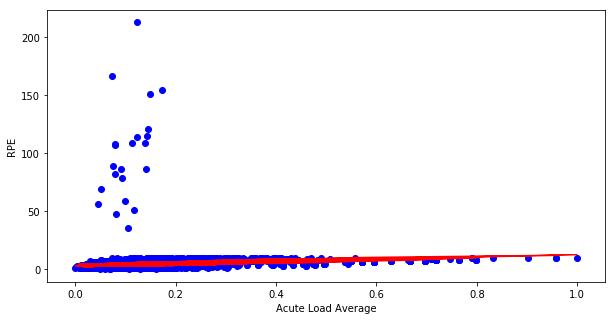

In [24]:
plot_graph(ap[input_variable],ap['Actual'],ap['Predicted'],"blue","red",1,target_variable,input_variable)

### Comparison of Predicted Output vs Actual Output
#### Predicted overlaps with a large MSE

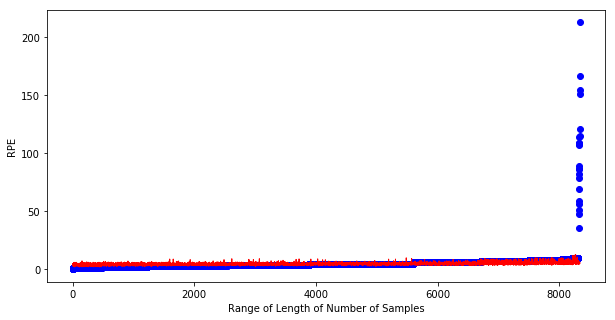

In [30]:
range_index_x_test = np.array(list(range(len(ap[input_variable]))))
plot_graph(range_index_x_test,ap['Actual'],ap['Predicted'],"blue","red",1,target_variable,"Range of Length of Number of Samples")

## Cross Validation of results using 10-Fold CV

In [31]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=5)
results = model_selection.cross_val_score(lm, x_train, y_train, cv=kfold, scoring='r2')
"R ^2: "+str(results.mean())

'R ^2: 0.05711763137978252'

## Combinatorial Feature Selection - MLPRegressor

In [11]:

remove_additional_features = ['Date', 'Key','Phase of Season','Session Type','RPE type','Overall load','Acute Load Total','Monotony','Strain','TSB Flag','Last week','Two weeks ago', 'LWk%change','Weekly Load']

f3_rpe = dropFeatures(f3,remove_additional_features)

reg_rpe = feature_selection("LinearRegression",regressionPerTarget,f3_rpe,'RPE')
reg_rpe

Feature Subsets  \
0                                                                                               Duration   
1                                                                                     Acute Load Average   
2                                                                                   Chronic Load Average   
3                                                                                                    TSB   
4                                                                                       Last 14d minimum   
5                                                                                        Muscle soreness   
6                                                                                                Fatigue   
7                                                                                                  Sleep   
8                                                                            Duration,Acute Load Average   
9                                                                          Duration,Chronic Load Average   
..                                                                                                   ...   
245                              Chronic Load Average,TSB,Last 14d minimum,Muscle soreness,Fatigue,Sleep   
246        Duration,Acute Load Average,Chronic Load Average,TSB,Last 14d minimum,Muscle soreness,Fatigue   
247          Duration,Acute Load Average,Chronic Load Average,TSB,Last 14d minimum,Muscle soreness,Sleep   
248                  Duration,Acute Load Average,Chronic Load Average,TSB,Last 14d minimum,Fatigue,Sleep   
249                   Duration,Acute Load Average,Chronic Load Average,TSB,Muscle soreness,Fatigue,Sleep   
250      Duration,Acute Load Average,Chronic Load Average,Last 14d minimum,Muscle soreness,Fatigue,Sleep   
251                       Duration,Acute Load Average,TSB,Last 14d minimum,Muscle soreness,Fatigue,Sleep   
252                     Duration,Chronic Load Average,TSB,Last 14d minimum,Muscle soreness,Fatigue,Sleep   
253           Acute Load Average,Chronic Load Average,TSB,Last 14d minimum,Muscle soreness,Fatigue,Sleep   
254  Duration,Acute Load Average,Chronic Load Average,TSB,Last 14d minimum,Muscle soreness,Fatigue,Sleep   

     R^2 Values  MSE Values  
0     -0.000255   33.024766  
1      0.019533   32.371453  
2      0.011606   32.633165  
3      0.005267   32.842463  
4      0.002101   32.946985  
5      0.003957   32.885715  
6      0.004485   32.868281  
7      0.002330   32.939406  
8      0.582998   13.767874  
9      0.752223    8.180699  
..          ...         ...  
245    0.021754   32.298109  
246    0.717258    9.335120  
247    0.728721    8.956639  
248    0.731578    8.862329  
249    0.035451   31.845882  
250    0.691568   10.183312  
251    0.638833   11.924413  
252    0.699685    9.915319  
253    0.020829   32.328659  
254    0.748663    8.298237  

[255 rows x 3 columns]

In [12]:
reg_rpe_best = reg_rpe.sort_values('R^2 Values',ascending=False).head(10)
reg_rpe_best

Feature Subsets  \
99                                         Duration,Acute Load Average,TSB,Fatigue   
102                           Duration,Acute Load Average,Last 14d minimum,Fatigue   
38                                    Duration,Acute Load Average,Last 14d minimum   
36                                Duration,Acute Load Average,Chronic Load Average   
40                                             Duration,Acute Load Average,Fatigue   
164                   Duration,Acute Load Average,Chronic Load Average,TSB,Fatigue   
162          Duration,Acute Load Average,Chronic Load Average,TSB,Last 14d minimum   
42                                               Duration,Chronic Load Average,TSB   
107                             Duration,Chronic Load Average,TSB,Last 14d minimum   
219  Duration,Acute Load Average,Chronic Load Average,TSB,Last 14d minimum,Fatigue   

     R^2 Values  MSE Values  
99     0.786664    7.043574  
102    0.782924    7.167049  
38     0.780924    7.233083  
36     0.778836    7.302021  
40     0.776871    7.366903  
164    0.776256    7.387213  
162    0.775884    7.399485  
42     0.773958    7.463085  
107    0.773801    7.468254  
219    0.773713    7.471178

In [ ]:
list(reg_rpe_best['Feature Subsets'])

## Regression for all numerical features as target variables

In [ ]:
#numeric_target_features = [feature for feature in list(f3) if f3[feature].dtype in ['int64','float64']]
#r2list = [regressionPerTarget(target,f3,mode=0,input_variable=None,remove_additional_features=None,classifier="LinearRegression")[0] for target in list(numeric_target_features)]
#mselist = [regressionPerTarget(target,f3,mode=0,input_variable=None,remove_additional_features=None,classifier="LinearRegression")[1] for target in list(numeric_target_features)]
#pd.DataFrame({'Numerical Features as Targets': list(numeric_target_features), 'R^2 Values': r2list, 'MSE Values': mselist})


## Experimental Section

## Comments

#### 1. R^2 and Mean Square Error (MSE) are two scoring function to find the difference between the actual and predicted values of the test set.
#### 2. For R^2, 1.0 is a perfect fit and for MSE values closer to 0 describe minimum difference. 
#### 3. When "Weekly Load" was selected as the target feature to predict we got a perfect fit and the predicted values were very close to the actual values. The difference is visualized in [Observing the Actual vs Predicted Values](#actual-predicted)
#### 4. Though, as seen in [Analyzing the Regression Fuction](#analyzing-regression) the model overfits. This could be because of various reasons one of them being the test set having low variance and similar values to the training set. This effect was seen even through k-fold cross validation. Another reason could be a very good linear relationship between the target variable and the other features. This occurs when the target is calculated with a linear function over other features. 
#### 5. We could use regularization as a technique to improve overfitting but then the MSE scores would go up as the model learns to generalize. This means it would make incorrect test predictions. We could test that on new a new training set or drop features to remove features with a linear relationship.
#### 6. Feature Elimination: Through recursive feature elimination it was found that only the numerical feature were selected for regression. Though that provides the same fit as the baseline regression
#### 7. Feature EElimination: The following features were excluded as a test "Overall load","Acute Load Total","Acute Load Average" and the R^2 was reduced to 0.91 whereas the MSE increased to 127008
#### 8. Correction: The above model does not seem to overfit, the graphs above display the accuracy(in terms of MSE) of the regression with the actual data. The low MSE values are the best indicator of the regression model.  

## Performing MultiLayerPerceptron Regression

In [22]:
r2,mse,cat_feat,num_feat,loadprediction_samples,loadprediction_groundTruth,model,x_train,x_test,y_train,y_test,predictions= regressionPerTarget(target_variable,f3_lr_rpe,0,input_variable,classifier="mlp_regressor")

In [ ]:
#Debugging MLP Regressor
#mlp = MLPRegressor(hidden_layer_sizes=(50,50,50), max_iter=2000,alpha=0.1,solver='adam',learning_rate_init=0.001,learning_rate='adaptive', tol=0.01,verbose=False,warm_start=True)
#mlp_obj = mlp.fit(x_train.values,y_train.values.ravel())
    
#predictions = mlp.predict(x_test)
#y_pred = predictions.ravel()
#r2 = mlp.score(x_test, y_test)
#mse = mean_squared_error(y_test, y_pred)

#print ("R^2 Score: ",str(r2))
#print ("Mean Squared Error: ",str(mse))

## Scores for MLP Regressor

In [23]:
print ("R^2 Score: ",str(r2))
print ("Mean Squared Error: ",str(mse))

R^2 Score:  0.03839504635192581
Mean Squared Error:  31.74868404871006


## Observing The Actual vs Predicted Values

In [24]:
YP = y_test[target_variable].values
y_pred = predictions.ravel()

act_pred = pd.DataFrame({input_variable:x_test[input_variable],'Actual': YP, 'Predicted': y_pred})
ap = act_pred.sort_values('Actual')
ap

Acute Load Average  Actual  Predicted
9953             0.069304     0.0   3.642907
13558            0.129349     0.0   3.659794
13560            0.160494     0.0   4.274944
23555            0.069585     0.0   4.465898
23568            0.059203     0.0   3.328897
22344            0.107744     0.0   4.723297
16924            0.049944     0.0   3.014451
13267            0.164422     1.0   4.992137
8010             0.087262     1.0   3.369618
21555            0.019080     1.0   3.463666
...                   ...     ...        ...
3734             0.079686   108.0   5.289717
3732             0.138047   109.0   5.839703
3773             0.112233   109.0   5.387435
3728             0.123737   114.0   5.240690
3752             0.143659   115.0   5.671715
3759             0.144220   121.0   6.512820
3754             0.149832   151.0   5.439199
3749             0.173681   155.0   5.951608
3761             0.073232   167.0   5.128489
3764             0.122334   213.0   5.887354

[8341 rows x 3 columns]

## Analyzing the regression function based on a single input variable
### Regression line of single feature over the target variable

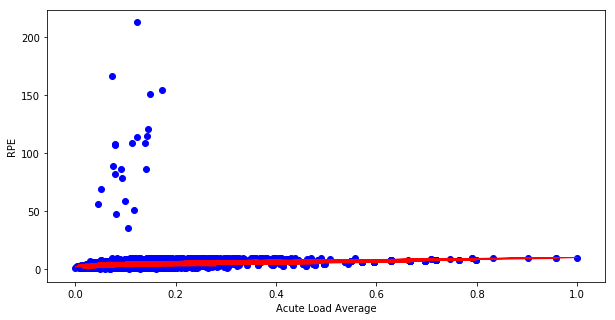

In [25]:
plot_graph(ap[input_variable],ap['Actual'],ap['Predicted'],"blue","red",1,target_variable,input_variable)

### Comparison of Predicted Output vs Actual Output
#### Predicted overlaps with a large MSE

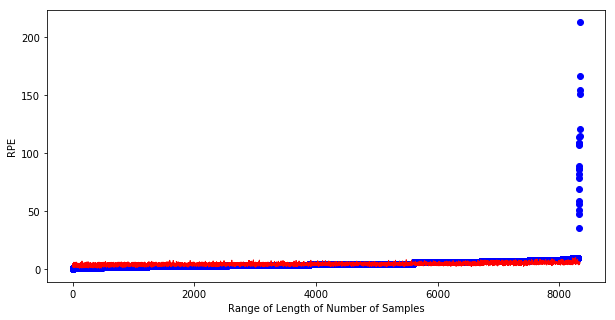

In [26]:
range_index_x_test = np.array(list(range(len(ap[input_variable]))))
plot_graph(range_index_x_test,ap['Actual'],ap['Predicted'],"blue","red",1,target_variable,"Range of Length of Number of Samples")

## Combinatorial Feature Selection - MLPRegressor

In [ ]:
f3_mlp_rpe = dropFeatures(f3,remove_additional_features)
mlpreg_rpe = feature_selection("MLPRegression",regressionPerTarget,f3_mlp_rpe,'RPE')
mlpreg_rpe

In [ ]:
mlpreg_rpe_best = mlpreg_rpe.sort_values('R^2 Values',ascending=False).head(10)

In [ ]:
mlpreg_rpe_best

In [ ]:
list(mlpreg_rpe_best['Feature Subsets'])

## Cross Validation of results using k-Fold CV

In [25]:
X = loadprediction_samples.values
Y = loadprediction_groundTruth.values.ravel()

kfold = model_selection.KFold(n_splits=5)
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='r2')
"R ^2: "+str(results.mean())

NameError: name 'model' is not defined

In [26]:
## Exploring the GPS Dataset

In [27]:
f4

Date         Key  Session Type Training Status        Position  \
0       27/02/2018  Player 108  Conditioning   Full Training      Linebacker   
1       27/02/2018  Player 108  Conditioning   Full Training      Linebacker   
2       27/02/2018  Player 108  Conditioning   Full Training      Linebacker   
3       27/02/2018  Player 108  Conditioning   Full Training      Linebacker   
4       27/02/2018  Player 108  Conditioning   Full Training      Linebacker   
5       27/02/2018   Player 26  Conditioning   Full Training  Offensive Line   
6       27/02/2018   Player 26  Conditioning   Full Training  Offensive Line   
7       27/02/2018   Player 26  Conditioning   Full Training  Offensive Line   
8       27/02/2018   Player 26  Conditioning   Full Training  Offensive Line   
9       27/02/2018   Player 24  Conditioning   Full Training   Wide Receiver   
...            ...         ...           ...             ...             ...   
141459  01/07/2016    Player 5  Conditioning   Full Training   Wide Receiver   
141460  01/07/2016    Player 5  Conditioning   Full Training   Wide Receiver   
141461  01/07/2016    Player 5  Conditioning   Full Training   Wide Receiver   
141462  01/07/2016   Player 97  Conditioning   Full Training       Tight End   
141463  01/07/2016   Player 97  Conditioning   Full Training       Tight End   
141464  01/07/2016   Player 97  Conditioning   Full Training       Tight End   
141465  01/07/2016   Player 97  Conditioning   Full Training       Tight End   
141466  01/07/2016   Player 97  Conditioning   Full Training       Tight End   
141467  01/07/2016   Player 97  Conditioning   Full Training       Tight End   
141468  01/07/2016   Player 97  Conditioning   Full Training       Tight End   

           Line      Period Name  Period Number Total Duration  \
0       Defense          Session            0.0       01:12:19   
1       Defense          STRETCH            1.0       00:14:32   
2       Defense        8 STATION            2.0       00:32:12   
3       Defense        4 STATION            3.0       00:16:33   
4       Defense             INDY            4.0       00:09:01   
5       Offense          Session            0.0       00:46:55   
6       Offense          STRETCH            1.0       00:14:32   
7       Offense        8 STATION            2.0       00:23:21   
8       Offense             INDY            3.0       00:09:01   
9       Offense          Session            0.0       01:12:19   
...         ...              ...            ...            ...   
141459  Offense            PLYOS            4.0       00:04:00   
141460  Offense          SPRINTS            5.0       00:19:00   
141461  Offense        COOL DOWN            6.0       00:05:00   
141462  Offense          Session            0.0       01:25:00   
141463  Offense           1 ON 1            1.0       00:12:00   
141464  Offense           7 ON 7            2.0       00:31:00   
141465  Offense  DYNAMIC WARM UP            3.0       00:14:00   
141466  Offense            PLYOS            4.0       00:04:00   
141467  Offense          SPRINTS            5.0       00:19:00   
141468  Offense        COOL DOWN            6.0       00:05:00   

        Total Distance     ...       PLSlow 7D SDS  EE 7D SDS  \
0              0.00000     ...                1.95       0.70   
1              0.00000     ...                 NaN        NaN   
2              0.00000     ...                 NaN        NaN   
3              0.00000     ...                 NaN        NaN   
4              0.00000     ...                 NaN        NaN   
5              0.00000     ...                1.68      -0.12   
6              0.00000     ...                 NaN        NaN   
7              0.00000     ...                 NaN        NaN   
8              0.00000     ...                 NaN        NaN   
9              0.00000     ...                1.66       1.74   
...                ...     ...                 ...        ...   
141459       103.515

### Debugging - Ignore the sections below this

In [135]:

import pandas as pd
pd.set_option("display.max_rows",27801)
pd.set_option("display.max_columns",27801)

In [136]:
l = list(f3.Key)
l = [word.replace('Player ','') for word in l ]
l

pos = [index for index,num in enumerate(l) if num=="108"]

#for ind in pos:
    #print(f3.loc[ind,:])
f3.loc[pos,:]

Date         Key      Phase of Season   Session Type   RPE  \
11     27/02/2018  Player 108  Winter Conditioning   Conditioning   8.0   
109    26/02/2018  Player 108  Winter Conditioning   Conditioning   5.0   
185    24/05/2018  Player 108           Transition   Conditioning   5.0   
301    23/02/2018  Player 108  Winter Conditioning   Conditioning   8.0   
372    22/05/2018  Player 108           Transition   Conditioning   7.0   
444    22/02/2018  Player 108  Winter Conditioning   Conditioning   8.0   
522    21/04/2018  Player 108          Spring Ball  Team training   5.0   
583    20/04/2018  Player 108          Spring Ball  Team training   2.0   
640    20/02/2018  Player 108  Winter Conditioning   Conditioning   8.0   
780    31/10/2017  Player 108               PAC-12          Rehab   3.0   
822    31/07/2017  Player 108            Fall Camp  Team training   7.0   
953    31/05/2017  Player 108           Transition        Weights   6.0   
980    19/04/2018  Player 108          Spring Ball  Team training   4.0   
1051   19/02/2018  Player 108  Winter Conditioning   Conditioning   5.0   
1304   30/06/2017  Player 108  Summer Conditioning   Conditioning   6.0   
1407   30/05/2017  Player 108           Transition        Weights   5.0   
1523   29/10/2017  Player 108               PAC-12          Rehab   1.0   
1790   29/06/2017  Player 108  Summer Conditioning   Conditioning   5.0   
1816   17/05/2018  Player 108           Transition   Conditioning   5.0   
1955   29/04/2017  Player 108          Spring Ball           Game   5.0   
2017   17/04/2018  Player 108          Spring Ball  Team training   5.0   
2121   28/06/2017  Player 108  Summer Conditioning        Weights   7.0   
2248   28/02/2017  Player 108  Winter Conditioning        Weights   6.0   
2319   16/02/2018  Player 108  Winter Conditioning   Conditioning   8.0   
2400   27/10/2017  Player 108               PAC-12  Team training   2.0   
2441   27/09/2017  Player 108               PAC-12          Rehab   4.0   
2546   27/08/2017  Player 108               PAC-12          Rehab   2.0   
2656   27/06/2017  Player 108  Summer Conditioning   Conditioning   5.0   
2704   15/05/2018  Player 108           Transition   Conditioning   6.0   
2763   27/04/2017  Player 108          Spring Ball          Rehab   4.0   
2918   27/02/2017  Player 108  Winter Conditioning   Conditioning   9.0   
2986   15/02/2018  Player 108  Winter Conditioning   Conditioning   8.0   
3042   27/01/2017  Player 108  Winter Conditioning        Weights   7.0   
3173   26/09/2017  Player 108               PAC-12          Rehab   5.0   
3208   26/08/2017  Player 108               PAC-12          Rehab   2.0   
3341   26/06/2017  Player 108  Summer Conditioning        Weights   5.0   
3375   26/05/2017  Player 108           Transition        Weights   5.0   
3439   26/04/2017  Player 108          Spring Ball          Rehab   4.0   
3515   14/04/2018  Player 108          Spring Ball  Team training   6.0   
3622   14/03/2018  Player 108          Spring Ball  Team training   6.0   
3787   25/05/2017  Player 108           Transition        Weights   4.0   
3924   25/04/2017  Player 108          Spring Ball          Rehab   5.0   
3960   13/02/2018  Player 108  Winter Conditioning   Conditioning   8.0   
4027   24/11/2017  Player 108               PAC-12  Team training   1.0   
4185   24/10/2017  Player 108               PAC-12          Rehab   3.0   
4250   24/09/2017  Player 108               PAC-12  Team training   3.0   
4306   24/08/2017  Player 108            Fall Camp          Rehab   3.0   
4469   24/04/2017  Player 108          Spring Ball        Weights   5.0   
4525   12/04/2018  Player 108          Spring Ball  Team training   5.0   
4617   12/03/2018  Player 108          Spring Ball  Team training   6.0   
4664   24/02/2017  Player 108  Winter Conditioning        Weights   7.0   
4766   12/02/2018  Player 108  Winter Conditioning   Conditioning   5.0   
4908   23/08/2017  Player 108         

In [12]:
l = list(f4.Key)
l = [word.replace('Player ','') for word in l ]
l

pos = [index for index,num in enumerate(l) if num=="108"]

#for ind in pos:
    #print(f3.loc[ind,:])
f4.loc[pos,:]

Date         Key   Session Type Training Status    Position  \
0       27/02/2018  Player 108   Conditioning   Full Training  Linebacker   
1       27/02/2018  Player 108   Conditioning   Full Training  Linebacker   
2       27/02/2018  Player 108   Conditioning   Full Training  Linebacker   
3       27/02/2018  Player 108   Conditioning   Full Training  Linebacker   
4       27/02/2018  Player 108   Conditioning   Full Training  Linebacker   
380     26/02/2018  Player 108   Conditioning   Full Training  Linebacker   
381     26/02/2018  Player 108   Conditioning   Full Training  Linebacker   
441     24/05/2018  Player 108   Conditioning   Full Training  Linebacker   
442     24/05/2018  Player 108   Conditioning   Full Training  Linebacker   
443     24/05/2018  Player 108   Conditioning   Full Training  Linebacker   
444     24/05/2018  Player 108   Conditioning   Full Training  Linebacker   
731     23/02/2018  Player 108   Conditioning   Full Training  Linebacker   
732     23/02/2018  Player 108   Conditioning   Full Training  Linebacker   
733     23/02/2018  Player 108   Conditioning   Full Training  Linebacker   
734     23/02/2018  Player 108   Conditioning   Full Training  Linebacker   
876     22/05/2018  Player 108   Conditioning   Full Training  Linebacker   
877     22/05/2018  Player 108   Conditioning   Full Training  Linebacker   
878     22/05/2018  Player 108   Conditioning   Full Training  Linebacker   
879     22/05/2018  Player 108   Conditioning   Full Training  Linebacker   
1214    22/02/2018  Player 108   Conditioning   Full Training  Linebacker   
1215    22/02/2018  Player 108   Conditioning   Full Training  Linebacker   
1216    22/02/2018  Player 108   Conditioning   Full Training  Linebacker   
1217    22/02/2018  Player 108   Conditioning   Full Training  Linebacker   
1414    21/04/2018  Player 108  Team training   Full Training  Linebacker   
1415    21/04/2018  Player 108  Team training   Full Training  Linebacker   
1416    21/04/2018  Player 108  Team training   Full Training  Linebacker   
1417    21/04/2018  Player 108  Team training   Full Training  Linebacker   
1418    21/04/2018  Player 108  Team training   Full Training  Linebacker   
1419    21/04/2018  Player 108  Team training   Full Training  Linebacker   
1420    21/04/2018  Player 108  Team training   Full Training  Linebacker   
1421    21/04/2018  Player 108  Team training   Full Training  Linebacker   
1422    21/04/2018  Player 108  Team training   Full Training  Linebacker   
1423    21/04/2018  Player 108  Team training   Full Training  Linebacker   
1942    20/04/2018  Player 108  Team training   Full Training  Linebacker   
1943    20/04/2018  Player 108  Team training   Full Training  Linebacker   
1944    20/04/2018  Player 108  Team training   Full Training  Linebacker   
1945    20/04/2018  Player 108  Team training   Full Training  Linebacker   
1946    20/04/2018  Player 108  Team training   Full Training  Linebacker   
1947    20/04/2018  Player 108  Team training   Full Training  Linebacker   
1948    20/04/2018  Player 108  Team training   Full Training  Linebacker   
2322    20/02/2018  Player 108   Conditioning   Full Training  Linebacker   
2323    20/02/2018  Player 108   Conditioning   Full Training  Linebacker   
2324    20/02/2018  Player 108   Conditioning   Full Training  Linebacker   
2325    20/02/2018  Player 108   Conditioning   Full Training  Linebacker   
4768    19/04/2018  Player 108  Team training   Full Training  Linebacker   
4769    19/04/2018  Player 108  Team training   Full Training  Linebacker   
4770    19/04/2018  Player 108  Team training   Full Training  Linebacker   
4771    19/04/2018  Player 108  Team training   Full Training  Linebacker   
4772    19/04/2018  Player 108  Team training   Full Training  Linebacker   
4773    19/04/2018  Player 108  Team training   Full Training  Linebacker   
4774    19/04/2018  Player 108  Team training   Full Training  Linebacker   
4775    19

In [13]:
f3['Session Type'].unique()

array(['Conditioning', 'Rehab', 'Team training', 'Weights', 'Game',
       'Cross Training', nan], dtype=object)

In [14]:
f4['Session Type'].unique()

array(['Conditioning', 'Rehab', 'Team training', nan, 'Game', 'Weights'],
      dtype=object)

#### Considering the keys and types of join
#### Use (Key,Session Type) as a paired key with a many-to-many match. Many to many as the (Key,Session) pairs are not unique.


In [9]:
import pandas as pd
remove_additional_features = ['Date','Phase of Season','RPE type','Overall load','Acute Load Total','Monotony','Strain','TSB Flag','Last week','Two weeks ago', 'LWk%change','Weekly Load']
f3_lr_rpe = dropFeatures(f3,remove_additional_features)

f5_lr_rpe = f4.loc[f4["Period Name"] == "Session"]


In [10]:
f_mode = pd.merge(f3_lr_rpe,f5_lr_rpe, on = ["Key","Session Type"])



In [ ]:
f5_mod_copy = f_mode.copy()
for column in f5_mod_copy:
    if f5_mod_copy[column].isna().sum() > 0.1*len(f5_mod_copy):
        f5_mod_copy.drop([column], axis = 1)

In [ ]:

for index, row in f5_mod_copy.iterrows():
    if f5_mod_copy.loc[index].isna().sum() > 0.1*len(f5_mod_copy.loc[index]):
        f5_mod_copy.drop([index], inplace=True)
        

In [18]:
f5_mod_copy

Key  Session Type  RPE  Duration  Acute Load Average  \
0         Player 7  Conditioning  8.0        60                 352   
1         Player 7  Conditioning  8.0        60                 352   
2         Player 7  Conditioning  8.0        60                 352   
3         Player 7  Conditioning  8.0        60                 352   
4         Player 7  Conditioning  8.0        60                 352   
5         Player 7  Conditioning  8.0        60                 352   
6         Player 7  Conditioning  8.0        60                 352   
7         Player 7  Conditioning  8.0        60                 352   
8         Player 7  Conditioning  8.0        60                 352   
9         Player 7  Conditioning  8.0        60                 352   
...            ...           ...  ...       ...                 ...   
1351502  Player 98         Rehab  7.0       122                 540   
1351503  Player 98         Rehab  7.0       122                 540   
1351504  Player 98         Rehab  1.0       127                 448   
1351505  Player 98         Rehab  1.0       127                 448   
1351506  Player 98         Rehab  3.0       102                 492   
1351507  Player 98         Rehab  3.0       102                 492   
1351508  Player 98         Rehab  3.0        54                 206   
1351509  Player 98         Rehab  3.0        54                 206   
1351510  Player 98         Rehab  3.0        83                 249   
1351511  Player 98         Rehab  3.0        83                 249   

         Chronic Load Average   TSB  Last 14d minimum Muscle soreness Fatigue  \
0                         309  1.14              1.00             NaN     NaN   
1                         309  1.14              1.00             NaN     NaN   
2                         309  1.14              1.00             NaN     NaN   
3                         309  1.14              1.00             NaN     NaN   
4                         309  1.14              1.00             NaN     NaN   
5                         309  1.14              1.00             NaN     NaN   
6                         309  1.14              1.00             NaN     NaN   
7                         309  1.14              1.00             NaN     NaN   
8                         309  1.14              1.00             NaN     NaN   
9                         309  1.14              1.00             NaN     NaN   
...                       ...   ...               ...             ...     ...   
1351502                   683  0.79              0.63            High     Low   
1351503                   683  0.79              0.63            High     Low   
1351504                   685  0.65              0.63            High     Low   
1351505                   685  0.65              0.63            High     Low   
1351506                   557  0.88              0.88            High     Low   
1351507                   557  0.88              0.88            High     Low   
1351508                   269  0.77              0.57         Average     Low   
1351509                   269  0.77              0.57         Average     Low   
1351510                   290  0.86              0.57            High     Low   
1351511                   290  0.86              0.57            High     Low   

            ...      PLSlow 7D SDS EE 7D SDS Collisions 7D SDS HID 7D SDS  \
0           ...               0.57      0.01              0.71        NaN   
1           ...              -0.04     -0.54              0.42        NaN   
2           ...              -1.47     -1.08             -1.18       3.04   
3           ...              -0.71      0.11              0.13        NaN   
4           ...              -1.54     -1.05             -1.10       2.83   
5           ...               0.00     -0.50              0.00        NaN   
6           ...              -1.53     -1.06             -1.29       2.71   
7           ...               0.00      0.00         

In [ ]:
reg_rpe = feature_selection("MLPRegression",regressionPerTarget,f5_mod_copy,'RPE')

In [16]:
mlpreg_rpe_best = reg_rpe.sort_values('R^2 Values',ascending=False)

Feature Subsets  \
0                                                                                                            Key   
1                                                                                                   Session Type   
2                                                                                                       Duration   
3                                                                                             Acute Load Average   
4                                                                                           Chronic Load Average   
5                                                                                                            TSB   
6                                                                                               Last 14d minimum   
7                                                                                                           Date   
8                                                                                                Training Status   
9                                                                                               Key,Session Type   
..                                                                                                           ...   
501                  Key,Session Type,Duration,Acute Load Average,Chronic Load Average,TSB,Last 14d minimum,Date   
502       Key,Session Type,Duration,Acute Load Average,Chronic Load Average,TSB,Last 14d minimum,Training Status   
503                   Key,Session Type,Duration,Acute Load Average,Chronic Load Average,TSB,Date,Training Status   
504      Key,Session Type,Duration,Acute Load Average,Chronic Load Average,Last 14d minimum,Date,Training Status   
505                       Key,Session Type,Duration,Acute Load Average,TSB,Last 14d minimum,Date,Training Status   
506                     Key,Session Type,Duration,Chronic Load Average,TSB,Last 14d minimum,Date,Training Status   
507           Key,Session Type,Acute Load Average,Chronic Load Average,TSB,Last 14d minimum,Date,Training Status   
508               Key,Duration,Acute Load Average,Chronic Load Average,TSB,Last 14d minimum,Date,Training Status   
509      Session Type,Duration,Acute Load Average,Chronic Load Average,TSB,Last 14d minimum,Date,Training Status   
510  Key,Session Type,Duration,Acute Load Average,Chronic Load Average,TSB,Last 14d minimum,Date,Training Status   

     R^2 Values  MSE Values  
0     -0.006332    2.223995  
1     -0.000829    2.211832  
2      0.412768    1.297782  
3      0.119586    1.945716  
4     -0.437262    3.176350  
5      0.139387    1.901954  
6     -0.001707    2.213772  
7      0.014542    2.177862  
8     -0.008239    2.228209  
9     -0.017755    2.249239  
..          ...         ...  
501    0.345572    1.446286  
502    0.222554    1.718156  
503    0.135264    1.911066  
504    0.069106    2.057276  
505   -0.085304    2.398522  
506   -0.267535    2.801253  
507   -0.043436    2.305994  
508    0.064136    2.068259  
509   -0.076853    2.379845  
510   -0.036624    2.290938  

[511 rows x 3 columns]